# First part

## see the data

In [2]:
file = "ObesityDataSet_raw_and_data_sinthetic.csv"
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

# Ensure the file is not open in another program
print(os.path.abspath(file))
data = pd.read_csv(file)
data


c:\Users\steff\OneDrive\Skrivebord\DTU\5. semester\Data topic\TAED2-SmartHealth.AI\ObesityDataSet_raw_and_data_sinthetic.csv


,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,Female,21.000000,1.620000,64.000000,yes,no,2.0,3.0,Sometimes,no,2.000000,no,0.000000,1.000000,no,Public_Transportation,Normal_Weight
1,Female,21.000000,1.520000,56.000000,yes,no,3.0,3.0,Sometimes,yes,3.000000,yes,3.000000,0.000000,Sometimes,Public_Transportation,Normal_Weight
2,Male,23.000000,1.800000,77.000000,yes,no,2.0,3.0,Sometimes,no,2.000000,no,2.000000,1.000000,Frequently,Public_Transportation,Normal_Weight
3,Male,27.000000,1.800000,87.000000,no,no,3.0,3.0,Sometimes,no,2.000000,no,2.000000,0.000000,Frequently,Walking,Overweight_Level_I
4,Male,22.000000,1.780000,89.800000,no,no,2.0,1.0,Sometimes,no,2.000000,no,0.000000,0.000000,Sometimes,Public_Transportation,Overweight_Level_II
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2106,Female,20.976842,1.710730,131.408528,yes,yes,3.0,3.0,Sometimes,no,1.728139,no,1.676269,0.906247,Sometimes,Public_Transportation,Obesity_Type_III
2107,Female,21.982942,1.748584,133.742943,yes,yes,3.0,3.0,Sometimes,no,2.005130,no,1.341390,0.599270,Sometimes,Public_Transportation,Obesity_Type_III
2108,Female,22.524036,1.752206,133.689352,yes,yes,3.0,3.0,Sometimes,no,2.054193,no,1.414209,0.646288,Sometimes,Public_Transportation,Obesity_Type_III
2109,Female,24.361936,1.739450,133.346641,yes,yes,3.0,3.0,Sometimes,no,2.852339,no,1.139107,0.586035,Sometimes,Public_Transportation,Obesity_Type_III


In [3]:
data.describe()

,Age,Height,Weight,FCVC,NCP,CH2O,FAF,TUE
count,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000
mean,24.312600,1.701677,86.586058,2.419043,2.685628,2.008011,1.010298,0.657866
std,6.345968,0.093305,26.191172,0.533927,0.778039,0.612953,0.850592,0.608927
min,14.000000,1.450000,39.000000,1.000000,1.000000,1.000000,0.000000,0.000000
25%,19.947192,1.630000,65.473343,2.000000,2.658738,1.584812,0.124505,0.000000
50%,22.777890,1.700499,83.000000,2.385502,3.000000,2.000000,1.000000,0.625350
75%,26.000000,1.768464,107.430682,3.000000,3.000000,2.477420,1.666678,1.000000
max,61.000000,1.980000,173.000000,3.000000,4.000000,3.000000,3.000000,2.000000


In [4]:
data["CAEC"].unique()

array(['Sometimes', 'Frequently', 'Always', 'no'], dtype=object)

In [5]:
data["CALC"].unique()

array(['no', 'Sometimes', 'Frequently', 'Always'], dtype=object)

In [6]:
data["MTRANS"].value_counts()

MTRANS
Public_Transportation    1580
Automobile                457
Walking                    56
Motorbike                  11
Bike                        7
Name: count, dtype: int64

In [7]:
data["NObeyesdad"].unique()

array(['Normal_Weight', 'Overweight_Level_I', 'Overweight_Level_II',
       'Obesity_Type_I', 'Insufficient_Weight', 'Obesity_Type_II',
       'Obesity_Type_III'], dtype=object)

## Making data into numbers 

In [8]:
# Create mapping dictionary for CAEC and CALC attributes
caec_calc_mapping = {
    'no': 0,
    'Sometimes': 1,
    'Frequently': 2,
    'Always': 3
}
caec_calc_mapping

data['CAEC'] = data['CAEC'].map(caec_calc_mapping)
data['CALC'] = data['CALC'].map(caec_calc_mapping)
data

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,Female,21.000000,1.620000,64.000000,yes,no,2.0,3.0,1,no,2.000000,no,0.000000,1.000000,0,Public_Transportation,Normal_Weight
1,Female,21.000000,1.520000,56.000000,yes,no,3.0,3.0,1,yes,3.000000,yes,3.000000,0.000000,1,Public_Transportation,Normal_Weight
2,Male,23.000000,1.800000,77.000000,yes,no,2.0,3.0,1,no,2.000000,no,2.000000,1.000000,2,Public_Transportation,Normal_Weight
3,Male,27.000000,1.800000,87.000000,no,no,3.0,3.0,1,no,2.000000,no,2.000000,0.000000,2,Walking,Overweight_Level_I
4,Male,22.000000,1.780000,89.800000,no,no,2.0,1.0,1,no,2.000000,no,0.000000,0.000000,1,Public_Transportation,Overweight_Level_II
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2106,Female,20.976842,1.710730,131.408528,yes,yes,3.0,3.0,1,no,1.728139,no,1.676269,0.906247,1,Public_Transportation,Obesity_Type_III
2107,Female,21.982942,1.748584,133.742943,yes,yes,3.0,3.0,1,no,2.005130,no,1.341390,0.599270,1,Public_Transportation,Obesity_Type_III
2108,Female,22.524036,1.752206,133.689352,yes,yes,3.0,3.0,1,no,2.054193,no,1.414209,0.646288,1,Public_Transportation,Obesity_Type_III
2109,Female,24.361936,1.739450,133.346641,yes,yes,3.0,3.0,1,no,2.852339,no,1.139107,0.586035,1,Public_Transportation,Obesity_Type_III


In [9]:
obesity_mapping = {
    "Insufficient_Weight": 0,
    "Normal_Weight": 1,
    "Overweight_Level_I": 2,
    "Overweight_Level_II": 3,
    "Obesity_Type_I": 4,
    "Obesity_Type_II": 5,
    "Obesity_Type_III": 6
}
data["Obesity"] = data["NObeyesdad"].map(obesity_mapping)

obi_g = {"Male": 0, "Female": 1}


# Convert binary 'yes'/'no' columns to 1/0
binary_columns = ['family_history_with_overweight', 'FAVC', 'SMOKE', 'SCC']
for col in binary_columns:
    data[col] = data[col].map({'yes': 1, 'no': 0})

# Identify categorical columns (excluding the target)
categorical_columns = [ 'MTRANS']

# Use one-hot encoding for categorical variables
data_encoded = pd.get_dummies(data, columns=categorical_columns, drop_first=False)

data_encoded.drop(["MTRANS_Public_Transportation"], axis=1, inplace=True)

data_encoded["Obesity"] = data_encoded["NObeyesdad"].map(obesity_mapping)

data_encoded["Gender"] = data_encoded["Gender"].map(obi_g)

data_encoded.drop("NObeyesdad", axis=1, inplace=True)

data_encoded

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,Obesity,MTRANS_Automobile,MTRANS_Bike,MTRANS_Motorbike,MTRANS_Walking
0,1,21.000000,1.620000,64.000000,1,0,2.0,3.0,1,0,2.000000,0,0.000000,1.000000,0,1,False,False,False,False
1,1,21.000000,1.520000,56.000000,1,0,3.0,3.0,1,1,3.000000,1,3.000000,0.000000,1,1,False,False,False,False
2,0,23.000000,1.800000,77.000000,1,0,2.0,3.0,1,0,2.000000,0,2.000000,1.000000,2,1,False,False,False,False
3,0,27.000000,1.800000,87.000000,0,0,3.0,3.0,1,0,2.000000,0,2.000000,0.000000,2,2,False,False,False,True
4,0,22.000000,1.780000,89.800000,0,0,2.0,1.0,1,0,2.000000,0,0.000000,0.000000,1,3,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2106,1,20.976842,1.710730,131.408528,1,1,3.0,3.0,1,0,1.728139,0,1.676269,0.906247,1,6,False,False,False,False
2107,1,21.982942,1.748584,133.742943,1,1,3.0,3.0,1,0,2.005130,0,1.341390,0.599270,1,6,False,False,False,False
2108,1,22.524036,1.752206,133.689352,1,1,3.0,3.0,1,0,2.054193,0,1.414209,0.646288,1,6,False,False,False,False
2109,1,24.361936,1.739450,133.346641,1,1,3.0,3.0,1,0,2.852339,0,1.139107,0.586035,1,6,False,False,False,False


## Coding with Data

In [10]:
from sklearn.ensemble import RandomForestClassifier as RFClassifier
from sklearn.model_selection import train_test_split as split_data, RandomizedSearchCV as RandSearch
from sklearn.metrics import accuracy_score as acc_score, classification_report as class_report
from sklearn.impute import SimpleImputer as Imputer
from sklearn.preprocessing import StandardScaler as Scaler
from sklearn.pipeline import Pipeline
# Target: obesity levels

# define features and target
X, y = data_encoded.drop(columns=["Obesity", "Weight"]), data_encoded["Obesity"]

# split into train and test sets
X_train, X_test, y_train, y_test = split_data(
    X, y, test_size=0.2, random_state=42
)

In [11]:
# build the unfitted RF
rf = RFClassifier(random_state=42)

In [12]:
print("[INFO] Setting search space…")
parameters = {
    'n_estimators': [300],
    'max_depth': [10, 20, 30, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 'log2']
}

[INFO] Setting search space…


In [13]:
print("[INFO] Running RandomizedSearchCV…")
search = RandSearch(
    estimator=rf,
    param_distributions=parameters,
    n_iter=100,
    scoring='accuracy',
    cv=5,
    n_jobs=-1,
    verbose=2,
    random_state=42
)
search.fit(X_train, y_train)

print(f"\nOptimal parameters: {search.best_params_}")
print(f"Best cross-validation accuracy: {search.best_score_:.4f}")

[INFO] Running RandomizedSearchCV…
Fitting 5 folds for each of 72 candidates, totalling 360 fits


c:\Users\steff\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\model_selection\_search.py:317: UserWarning: The total space of parameters 72 is smaller than n_iter=100. Running 72 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(



Optimal parameters: {'n_estimators': 300, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': 'sqrt', 'max_depth': 30}
Best cross-validation accuracy: 0.8803



Assessing model performance on validation data…
Validation Accuracy: 0.8723
Detailed Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.96      0.94        56
           1       0.68      0.77      0.72        62
           2       0.90      0.79      0.84        56
           3       0.81      0.78      0.80        50
           4       0.93      0.85      0.89        78
           5       0.89      0.95      0.92        58
           6       1.00      1.00      1.00        63

    accuracy                           0.87       423
   macro avg       0.87      0.87      0.87       423
weighted avg       0.88      0.87      0.87       423


Plotting confusion matrix…
Confusion matrix saved to 'confusion_matrix.png'

Visualizing top feature importances…
Feature importances saved to 'feature_importances.png'


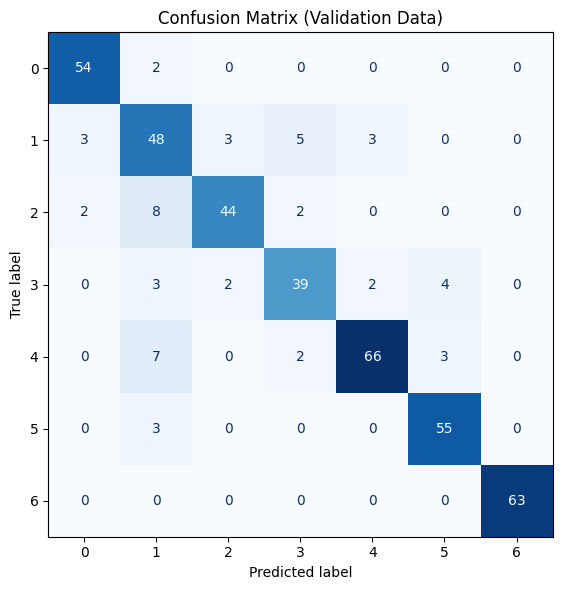

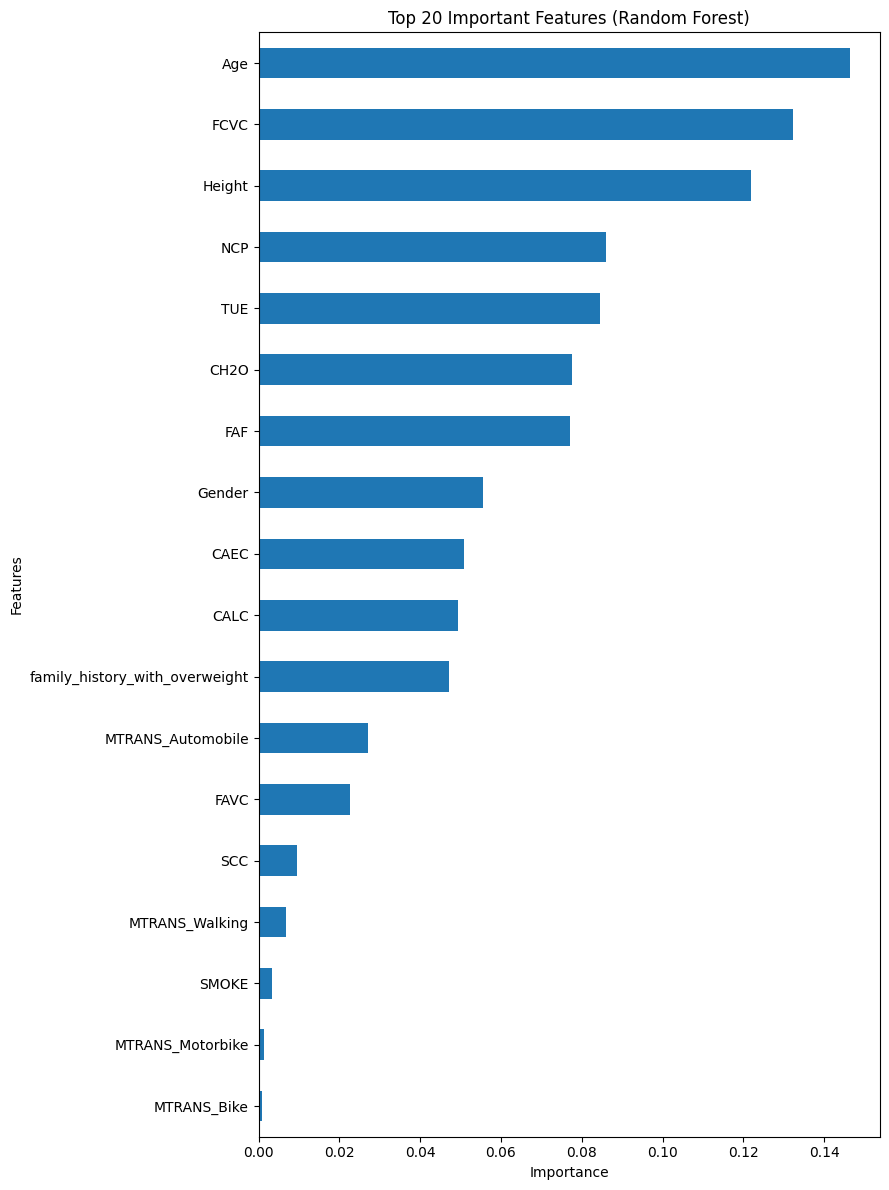

In [14]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

optimal_model: RFClassifier = search.best_estimator_

print("\nAssessing model performance on validation data…")
val_predictions = optimal_model.predict(X_test)
print(f"Validation Accuracy: {acc_score(y_test, val_predictions):.4f}")
print("Detailed Classification Report:")
print(class_report(y_test, val_predictions))

# ---------------- Confusion Matrix ----------------
print("\nPlotting confusion matrix…")
cm = confusion_matrix(y_test, val_predictions, labels=optimal_model.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=optimal_model.classes_)
fig_cm, ax_cm = plt.subplots(figsize=(8, 6))
disp.plot(ax=ax_cm, cmap="Blues", values_format="d", colorbar=False)
plt.title("Confusion Matrix (Validation Data)")
plt.tight_layout()
plt.savefig("confusion_matrix.png", dpi=200)
print("Confusion matrix saved to 'confusion_matrix.png'")

# ---------------- Feature Importances ----------------
print("\nVisualizing top feature importances…")
rf_best: RFClassifier = optimal_model

feat_names = X_train.columns
importances = rf_best.feature_importances_
topk = min(20, len(importances))
imp_series = pd.Series(importances, index=feat_names).nlargest(topk)

fig, ax = plt.subplots(figsize=(9, 12))
imp_series.sort_values().plot(kind='barh', ax=ax)
ax.set_title("Top 20 Important Features (Random Forest)")
ax.set_xlabel("Importance")
ax.set_ylabel("Features")
plt.tight_layout()
plt.savefig("feature_importances.png", dpi=200)
print("Feature importances saved to 'feature_importances.png'")
